# Generate heat matrixes

This Notebook contains code to generate heat matrixes for:

1. DBpedia embeddings (using the cosine between vectors)
1. IBM WORD dataset relatedness values

## Import all libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

## Reading datasets

### Embeddings

Read embeddings data and calculate the heat matrix for the cosine between each pair of vectors.

* `urls` contains the names of the concepts/entities
* `vectors` contains the embeddings
  * `vectors_small` contains only the first 10 entries (in order to be visualizable in this notebook)

In [2]:
embs = pd.read_csv("../2_clean_datasets/embeddings.txt", header=None, delimiter=' ')
embs_n = embs.values

urls = embs.iloc[:,0].to_numpy()
urls = [u.replace('http://dbpedia.org/resource/' , '') for u in urls]

vectors_small = embs.iloc[:10,1:].to_numpy()

### Relatedness dataset (IBM WORD)

In [3]:
relness = pd.read_csv("../2_clean_datasets/relatedness_train.tsv", header=None, delimiter='\t')
relness.replace(regex='^http://dbpedia.org/resource/' , value='')

,0,1,2,3
0,The_One_(magazine),Television_program,0.1,Train
1,Japanese_language,Music,0.0,Train
2,Level_(video_gaming),Guinness_World_Records,1.0,Train
3,Entertainment,Murder,0.0,Train
4,Survival_horror,Commodore_64,0.0,Train
...,...,...,...,...
12632,Internet_radio,Man-in-the-browser,0.3,Train
12633,Social_network,Revised_Statutes_of_the_United_States,0.0,Train
12634,E-commerce,Device_fingerprint,0.1,Train
12635,HTTP_cookie,Internaut,0.4,Train


## Displaying heat matrix of cosines between embeddings

Cosines are calculated only for the `vectors_small` array

In [4]:
cosines_small = cosine_similarity(vectors_small)

The code below generates the heat map which helps visualizing the cosine between each pair of vectors. 

Without comparing with the IBM WORD dataset, there's no way of knowing if this represents what we want (semantic relatedness) but there are some weird cases (`Alchemy/Anarchism`). But even if we looked into IBM WORD, not all these pairs are featured there.

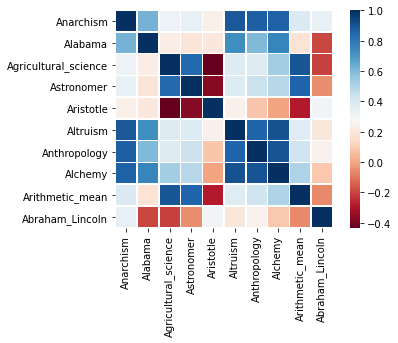

In [5]:
ax = sns.heatmap(cosines_small, square=True, linewidth=0.5, cmap="RdBu", xticklabels=urls[:10], yticklabels=urls[:10])
plt.show()

Some minor tweaks to hide repeated values:

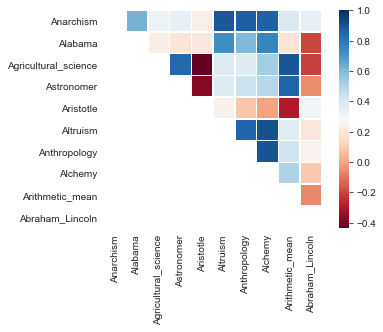

In [6]:
mask = np.zeros_like(cosines_small)
mask[np.tril_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(cosines_small, linewidth=0.5, mask=mask, vmax=1, square=True,cmap="RdBu", xticklabels=urls[:10], yticklabels=urls[:10])
    plt.show()